In [1]:
import numpy as np
import pandas as pd

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5222,ham,5 nights...We nt staying at port step liao...T...,NaN,NaN,NaN
1465,spam,YOU 07801543489 are guaranteed the latests Nok...,NaN,NaN,NaN
3221,ham,"Hi, my love! How goes that day? Fuck, this mor...",NaN,NaN,NaN
3710,ham,"Sorry pa, i dont knw who ru pa?",NaN,NaN,NaN
2222,ham,Great. I was getting worried about you. Just k...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
930,ham,I'm really sorry i won't b able 2 do this frid...
3002,ham,I will see in half an hour
1134,ham,U wake up already? Thanx 4 e tau sar piah it's...
3183,ham,Good morning pookie pie! Lol hope I didn't wak...
57,ham,"Sorry, I'll call later in meeting."


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2218,ham,Nice talking to you! please dont forget my pix...
407,ham,Hello! Good week? Fancy a drink or something l...
4412,ham,Sad story of a Man - Last week was my b'day. M...
5438,ham,"\What are youdoing later? Sar xxx\"""""
673,ham,Ditto. And you won't have to worry about me sa...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

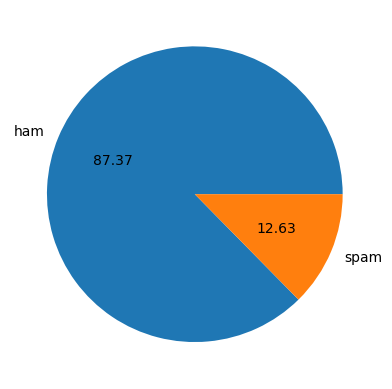

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
import nltk

In [24]:
!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yukth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [29]:
df.loc[:, 'num_characters'] = df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
df.loc[:, 'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))



In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:

df.loc[:, 'num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2
1,0,Ok lar... Joking wif u oni...,29,8,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2
3,0,U dun say so early hor... U c already then say...,49,13,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1


In [38]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

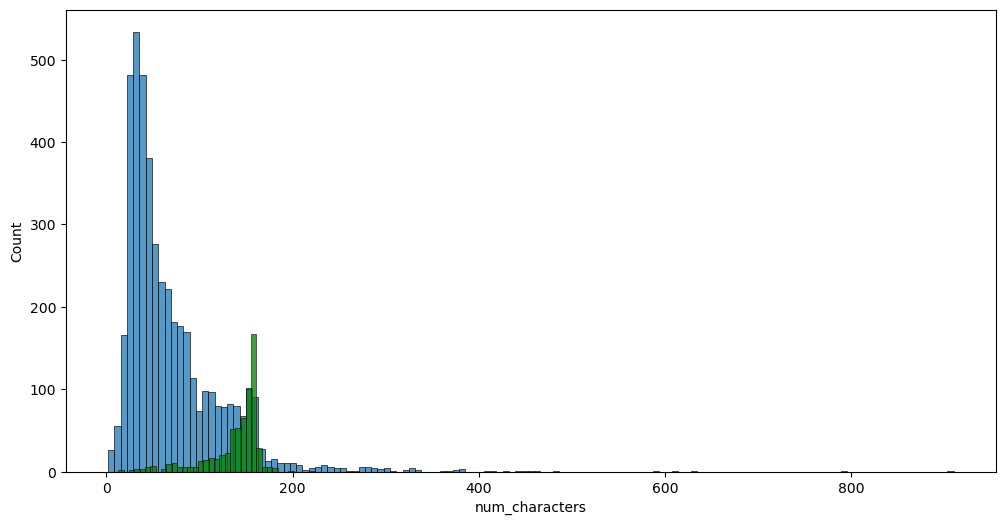

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='green')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


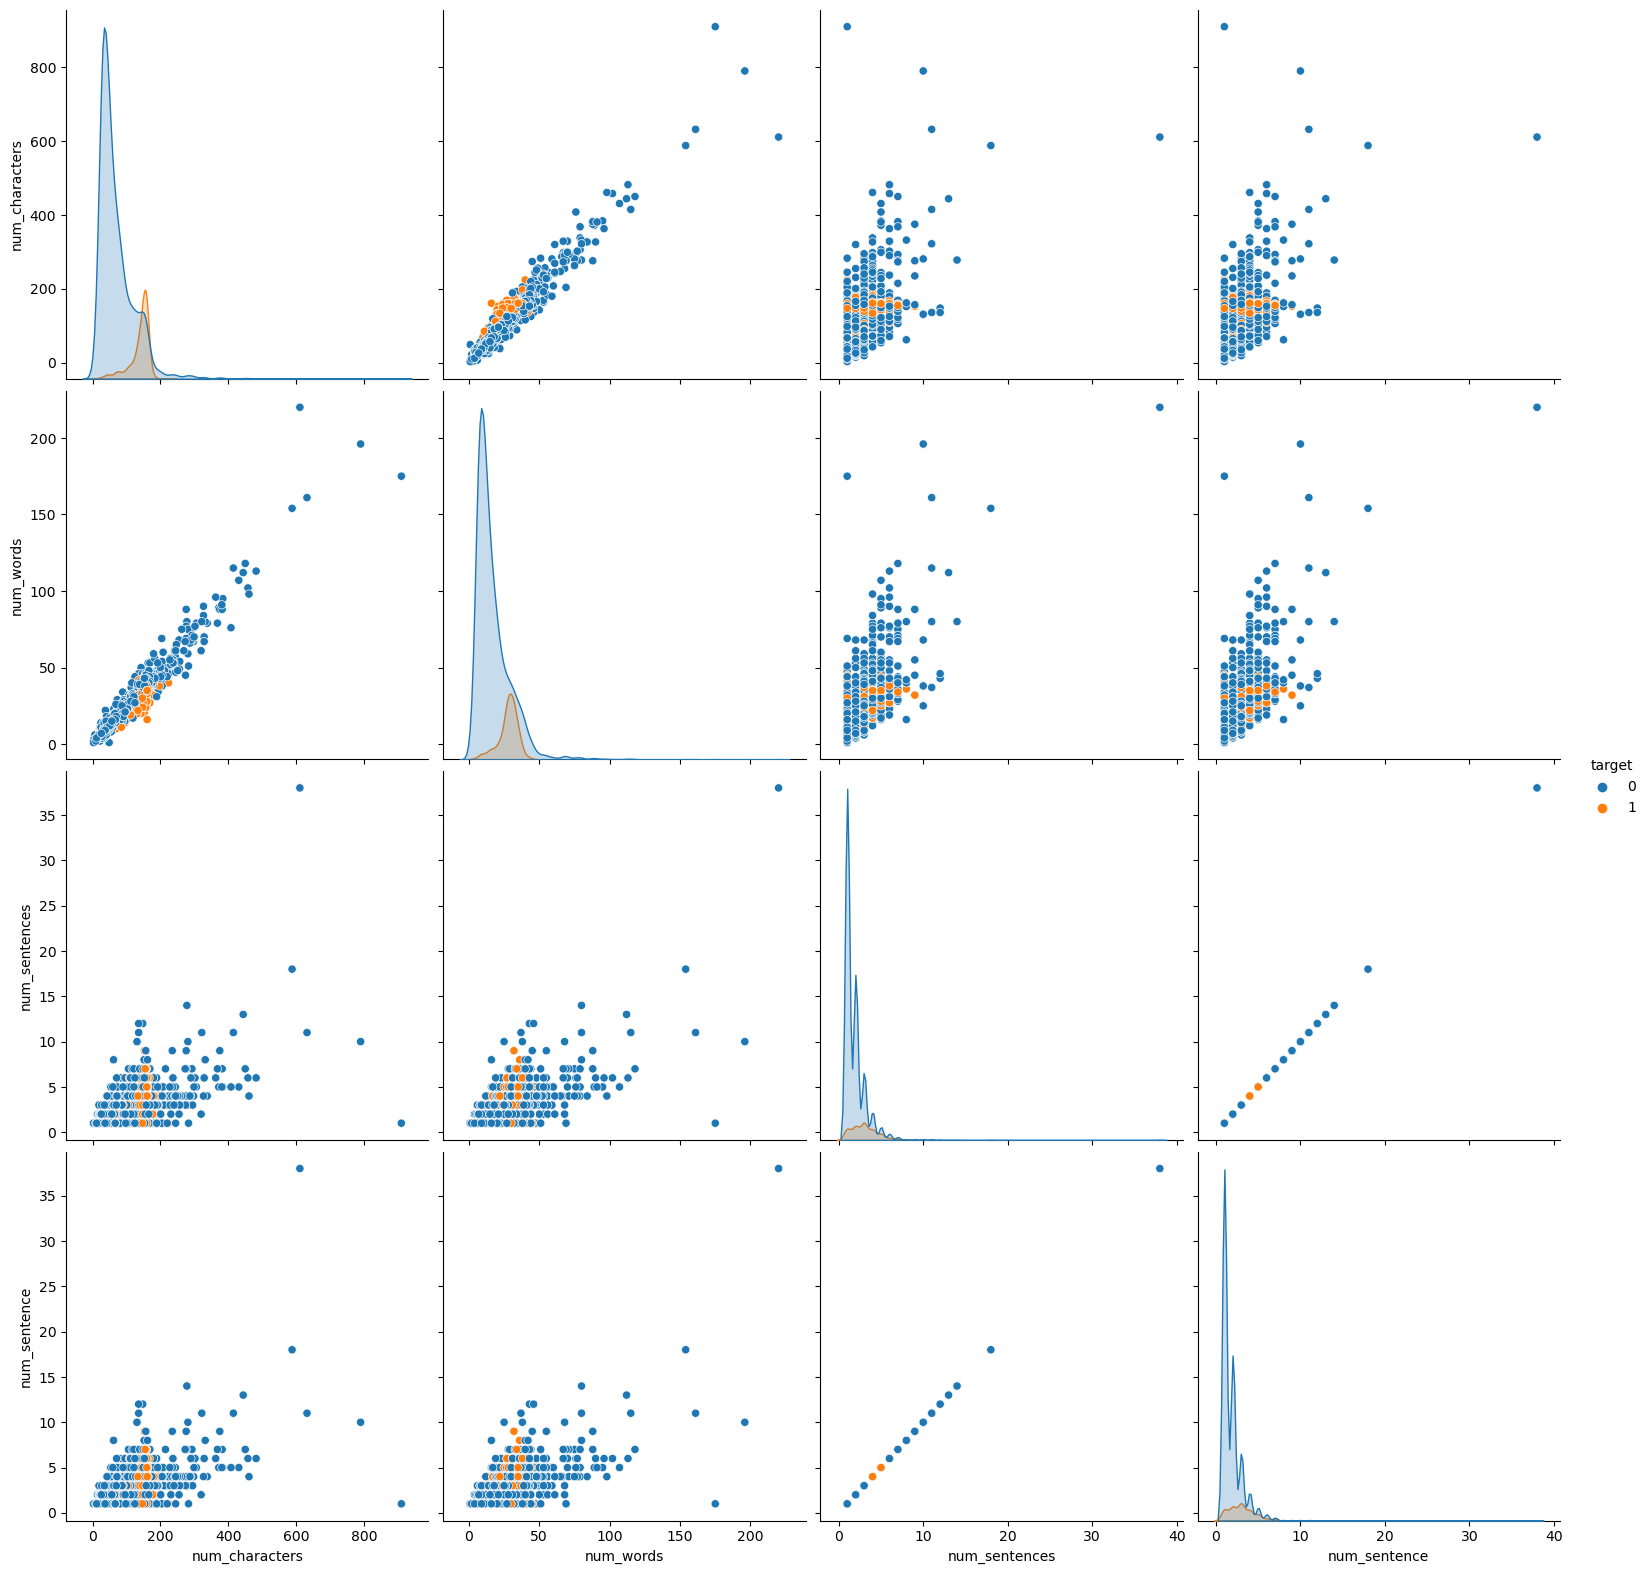

In [49]:
# Set a larger figure size to provide more space for the plots
sns.pairplot(df, hue='target', height=4, aspect=1)



<Axes: >

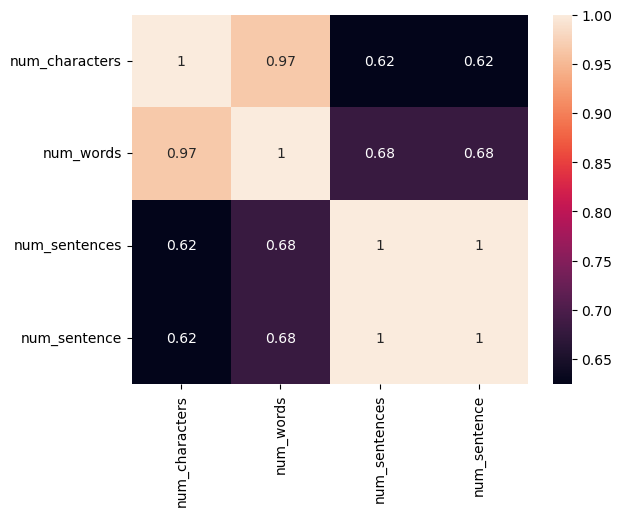

In [50]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yukth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'join' is not defined

In [53]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)  # Corrected join function here

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight,k?I've cried enough today")

print(transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


In [54]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [55]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [57]:
df['transformed_text'] = df['text'].apply(transform_text)

In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,nah think goe usf live around though


In [67]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [68]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

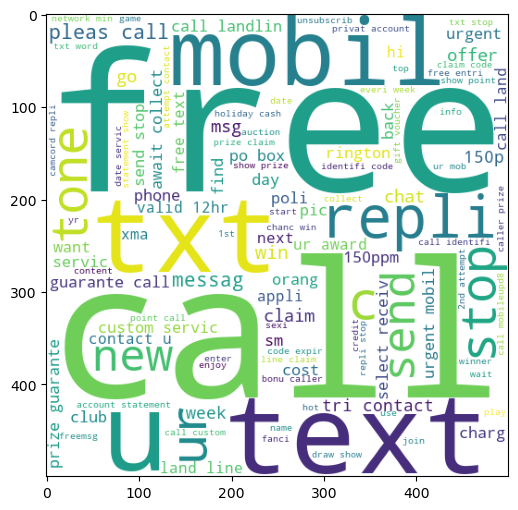

In [69]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,nah think goe usf live around though


In [72]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
              for word in msg.split():
                  spam_corpus.append(word)

In [73]:
len(spam_corpus)

9939

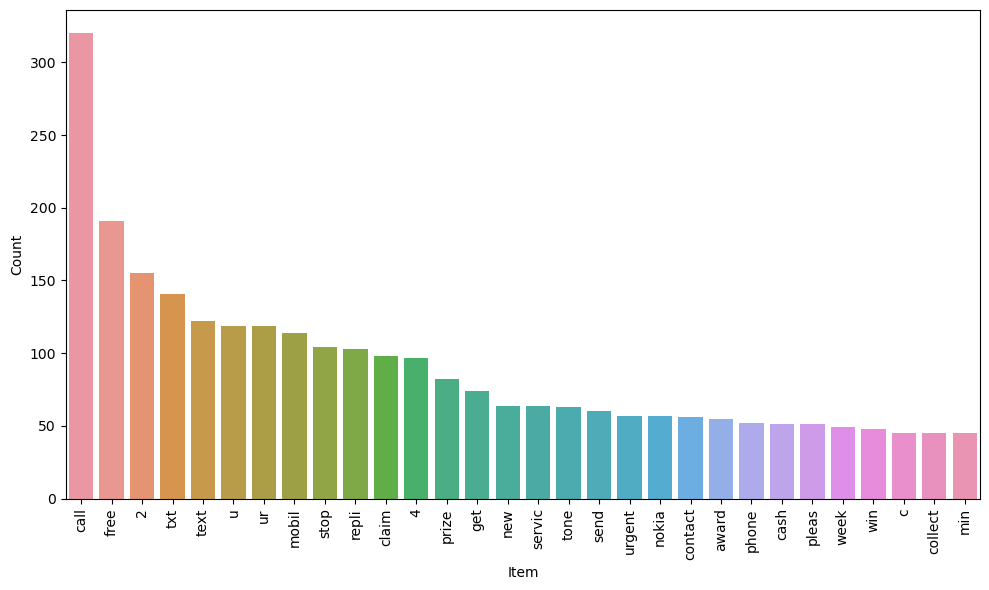

In [78]:
from collections import Counter
common_items = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the Counter object for better manipulation
common_items_df = pd.DataFrame(common_items, columns=['Item', 'Count'])

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.barplot(x='Item', y='Count', data=common_items_df)
plt.xticks(rotation='vertical')
plt.tight_layout()  # Optional: Adjust layout for better display of labels
plt.show()

In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,nah think goe usf live around though


In [80]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [81]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [82]:
X.shape

(5169, 3000)

In [83]:
y = df['target'].values

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [87]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [88]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [90]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [91]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [92]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.1/99.8 MB 374.1 kB/s eta 0:04:27
   ---------------------------------------- 0.2/99.8 MB 615.9 kB/s eta 0:02:42
   ---------------------------------------- 0.4/99.8 MB 1.3 MB/s eta 0:01:18
   ----------------------------------------

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  # Correct naming convention
from sklearn.ensemble import AdaBoostClassifier  # Correct naming convention
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier  # Correct naming convention
from xgboost import XGBClassifier


In [101]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [102]:
clfs = {
    'SVC': SVC,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [103]:
def train_classifier(clf,x_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train) 
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred) 
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [104]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [117]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [118]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4135, 3000)
(4135,)
(1034, 3000)
(1034,)


In [119]:
print(X_train[:5])  # Print first 5 rows of X_train
print(y_train[:5])  # Print first 5 elements of y_train

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 0 0 0]


In [122]:
for name, clf in clfs.items():
    print(f"Type of {name}: {type(clf)}")


Type of SVC: <class 'abc.ABCMeta'>
Type of KN: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Type of NB: <class 'sklearn.naive_bayes.MultinomialNB'>
Type of DT: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Type of LR: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Type of RF: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Type of AdaBoost: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Type of BgC: <class 'sklearn.ensemble._bagging.BaggingClassifier'>
Type of ETC: <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
Type of GBDT: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Type of xgb: <class 'xgboost.sklearn.XGBClassifier'>


In [126]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import xgboost as xgb

# Initialize instances of each classifier
classifiers = {
    'SVC': SVC(),
    'KN': KNeighborsClassifier(),
    'NB': MultinomialNB(),
    'DT': DecisionTreeClassifier(),
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'BgC': BaggingClassifier(),
    'ETC': ExtraTreesClassifier(),
    'GBDT': GradientBoostingClassifier(),
    'xgb': xgb.XGBClassifier()
}

# Example usage of train_classifier function for each classifier
accuracy_scores = {}
precision_scores = {}

for name, clf in classifiers.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores[name] = current_accuracy
    precision_scores[name] = current_precision

    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)




For SVC
Accuracy: 0.9729206963249516
Precision: 0.9824561403508771
For KN
Accuracy: 0.9052224371373307
Precision: 1.0
For NB
Accuracy: 0.9709864603481625
Precision: 1.0
For DT
Accuracy: 0.9458413926499033
Precision: 0.7887323943661971
For LR
Accuracy: 0.9564796905222437
Precision: 0.979381443298969
For RF
Accuracy: 0.9729206963249516
Precision: 0.9824561403508771
For AdaBoost
Accuracy: 0.9613152804642167
Precision: 0.9375
For BgC
Accuracy: 0.9526112185686654
Precision: 0.8503937007874016
For ETC
Accuracy: 0.9777562862669246
Precision: 0.9752066115702479
For GBDT
Accuracy: 0.9564796905222437
Precision: 0.9345794392523364
For xgb
Accuracy: 0.971953578336557
Precision: 0.943089430894309


In [129]:
accuracy_series = pd.Series(accuracy_scores)
precision_series = pd.Series(precision_scores)

# Create DataFrame using the Series
performance_df = pd.DataFrame({'Algorithm': list(classifiers.keys()), 'Accuracy': accuracy_series, 'Precision': precision_series}).sort_values('Precision', ascending=False)


In [130]:
performance_df

,Algorithm,Accuracy,Precision
KN,KN,0.905222,1.000000
NB,NB,0.970986,1.000000
SVC,SVC,0.972921,0.982456
RF,RF,0.972921,0.982456
LR,LR,0.956480,0.979381
ETC,ETC,0.977756,0.975207
xgb,xgb,0.971954,0.943089
AdaBoost,AdaBoost,0.961315,0.937500
GBDT,GBDT,0.956480,0.934579
BgC,BgC,0.952611,0.850394


In [131]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [132]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,SVC,Accuracy,0.972921
3,RF,Accuracy,0.972921
4,LR,Accuracy,0.956480
5,ETC,Accuracy,0.977756
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.961315
8,GBDT,Accuracy,0.956480
9,BgC,Accuracy,0.952611


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


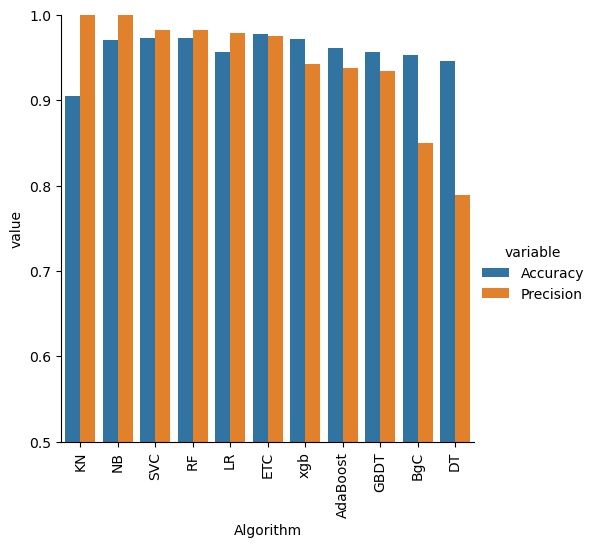

In [133]:
sns.catplot(x = 'Algorithm', y ='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [135]:
temp_df = pd.DataFrame({'Algorithm': list(classifiers.keys()),'Accuracy_max_ft_3000': list(accuracy_scores.values()),'Precision_max_ft_3000': list(precision_scores.values())}).sort_values('Precision_max_ft_3000', ascending=False)


In [136]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [137]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [139]:
temp_df = pd.DataFrame({'Algorithm': list(classifiers.keys()),'Accuracy_num_chars': list(accuracy_scores.values()),'Precision_num_chars': list(precision_scores.values())}).sort_values('Precision_num_chars', ascending=False)


In [140]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,SVC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
3,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,LR,0.956480,0.979381,0.956480,0.979381,0.956480,0.979381,0.956480,0.979381
5,ETC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
6,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.961315,0.937500,0.961315,0.937500,0.961315,0.937500,0.961315,0.937500
8,GBDT,0.956480,0.934579,0.956480,0.934579,0.956480,0.934579,0.956480,0.934579
9,BgC,0.952611,0.850394,0.952611,0.850394,0.952611,0.850394,0.952611,0.850394


In [141]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [142]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [143]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [146]:
y_pred = voting.predict(X_test) 
print("Accuracy", accuracy_score(y_test,y_pred)) 
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [147]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [148]:
from sklearn.ensemble import StackingClassifier

In [152]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [153]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [154]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb')) 
pickle.dump(mnb,open('model.pkl','wb'))

In [158]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB  # Fixed import typo

X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1, 0] 
tfidf = TfidfVectorizer(lowercase=True, stop_words='english') 
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:  # Corrected the string literal
    pickle.dump(mnb, model_file)
